<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/cnnlstm_PRO_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
import yfinance as yf


In [29]:

stock_symbol = 'AAPL'
stock = yf.download(stock_symbol,period="60mo",interval="1d")
print(stock.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-11-28  44.182499  45.322498  43.732498  45.235001  43.417046  184250000
2018-11-29  45.665001  45.700001  44.424999  44.887501  43.083504  167080000
2018-11-30  45.072498  45.082500  44.257500  44.645000  42.850765  158126000
2018-12-03  46.115002  46.235001  45.302502  46.205002  44.348057  163210000
2018-12-04  45.237499  45.597500  44.067501  44.172501  42.397247  165377200


In [30]:
b_size=32
epoch=200
train_per=0.8
w_size=20
f_size=10

In [31]:

X = []
Y = []

for i in range(0 , len(stock) - w_size -1 , 1):
    first = stock.iloc[i, 1]
    temp = []
    temp2 = []
    for j in range(w_size):
        temp.append((stock.iloc[i + j, 1] - first) / first)
    temp2.append((stock.iloc[i +w_size, 1] - first) / first)
    X.append(np.array(temp).reshape(w_size, 1))
    Y.append(np.array(temp2).reshape(1,1))
train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.1,shuffle=False)
len_t = len(train_X)


In [32]:
print(train_X)

[array([[ 0.        ],
       [ 0.00832925],
       [-0.00529534],
       [ 0.02013354],
       [ 0.00606766],
       [-0.03590929],
       [-0.0375089 ],
       [-0.06177945],
       [-0.05240223],
       [-0.05168512],
       [-0.04809965],
       [-0.06735061],
       [-0.07137728],
       [-0.07590046],
       [-0.07634176],
       [-0.1057973 ],
       [-0.12758558],
       [-0.16404651],
       [-0.13271553],
       [-0.13525285]]), array([[ 0.        ],
       [-0.01351204],
       [ 0.01170678],
       [-0.00224291],
       [-0.04387311],
       [-0.0454595 ],
       [-0.06952958],
       [-0.06022981],
       [-0.05951863],
       [-0.05596278],
       [-0.07505471],
       [-0.07904812],
       [-0.08353394],
       [-0.08397159],
       [-0.11318382],
       [-0.13479212],
       [-0.17095186],
       [-0.13987969],
       [-0.14239605],
       [-0.13282275]]), array([[ 0.        ],
       [ 0.02556425],
       [ 0.01142349],
       [-0.03077693],
       [-0.03238505],
     

In [33]:
print(len(train_X))
print(len(test_X))
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
# valid_label = np.array(valid_label)
# valid_X = np.array(valid_X)
train_X = train_X.reshape(train_X.shape[0],1,w_size,1)
test_X = test_X.reshape(test_X.shape[0],1,w_size,1)
print((train_X).shape)
print((test_X).shape)

1112
124
(1112, 1, 20, 1)
(124, 1, 20, 1)


In [34]:
model = Sequential()
#add model layers
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None,w_size,1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(60,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(60)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=epoch,batch_size=b_size,shuffle =False)
print(model.evaluate(test_X,test_label))

Epoch 1/200
35/35 [==============================] - 12s 49ms/step - loss: 0.0056 - val_loss: 0.0022
Epoch 2/200
35/35 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 3/200
35/35 [==============================] - 0s 10ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 4/200
35/35 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 5/200
35/35 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 6/200
35/35 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 7/200
35/35 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 8/200
35/35 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 9/200
35/35 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 10/200
35/35 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.001

In [35]:
predicted  = model.predict(test_X)
test_label = (test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
for j in range(len_t , len_t + len(test_X)):
    temp =stock.iloc[j,1]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

4/4 [==============================] - 1s 7ms/step


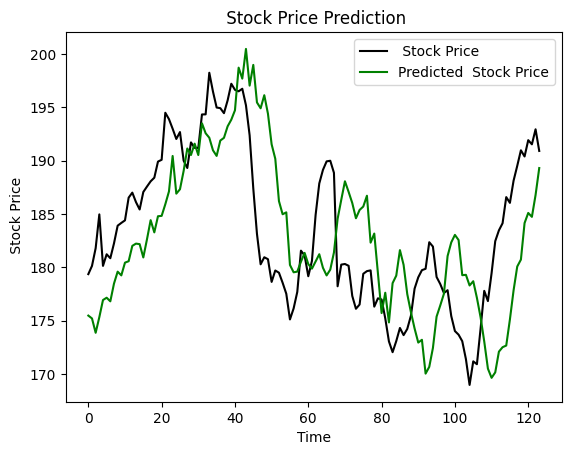

In [36]:
plt.plot(test_label, color = 'black', label = ' Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test_label, predicted)
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)

# Print results
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 5.862299396145728
MSE: 46.63365099449349
RMSE: 6.828883583316785
